This uses ChemCam cleaned, calibrated spectra from the PDS repository. The data is given in csv format with the first column being the wavelength and the following columns representing the intensities measured in units of photons per channels for each of the $n$ shots.

In [258]:
import pandas as pd
from pathlib import Path

In [259]:
sample_name = "cadillac"
data_path = Path("data/data/calib/calib_2015/1600mm/pls/")
sample_path = data_path / sample_name
sample_datasets = [f for f in sample_path.iterdir() if f.is_file() and f.suffix == ".csv"]


def get_dataset_frame(dataset_path):
    with open(dataset_path) as f:
        # find index of last line starting with "#" and skip rows until then
        for i, line in enumerate(f):
            if not line.startswith("#"):
                break
            
        # read csv from that line - columns also start wih "#"
        return pd.read_csv(dataset_path, skiprows=i-1)


data = pd.DataFrame()
exclude_from_avg = ["wave", "mean", "median"]
first_five_shots = [f"shot{i}" for i in range(1, 6)]

wavelengths = pd.Series()

for i, sample_set in enumerate(sample_datasets):
    df = get_dataset_frame(sample_set)

    # strip whitespace from column names
    df.columns = df.columns.str.strip()
    # remove # from column names
    df.columns = df.columns.str.replace("# ", "")

    if i == 0:
        wavelengths = df["wave"]
    else:
        assert wavelengths.equals(df["wave"])

    df.drop(exclude_from_avg, axis=1, inplace=True)
    df.drop(first_five_shots, axis=1, inplace=True)

    if i == 0:
        data = df
    else:
        data.add(df)
        
data = data.div(len(sample_datasets))
data["wave"] = wavelengths

In [260]:
data.head()

,shot6,shot7,shot8,shot9,shot10,shot11,shot12,shot13,shot14,shot15,...,shot42,shot43,shot44,shot45,shot46,shot47,shot48,shot49,shot50,wave
0,6.357763e+14,5.733128e+14,5.090813e+14,4.880031e+14,3.230137e+14,3.130979e+14,4.750001e+14,3.573663e+14,3.635147e+14,6.069886e+14,...,3.162266e+14,5.059583e+14,3.641227e+14,4.643417e+14,4.288772e+14,5.758090e+14,6.476907e+14,4.860756e+14,6.790235e+14,240.81100
1,4.251698e+11,2.956199e+11,2.991376e+11,2.529419e+11,2.240336e+11,2.068472e+11,2.674886e+11,1.756092e+11,2.132363e+11,3.390082e+11,...,1.973002e+11,2.264669e+11,2.082794e+11,2.221936e+11,2.412219e+11,3.102825e+11,2.999030e+11,2.497935e+11,4.027895e+11,240.86501
2,6.778057e+10,4.463985e+10,4.436213e+10,3.801237e+10,3.730120e+10,3.067414e+10,3.631470e+10,2.702718e+10,3.470959e+10,4.283134e+10,...,3.380780e+10,2.820921e+10,3.557806e+10,3.313588e+10,3.872870e+10,4.620632e+10,3.900902e+10,4.170200e+10,6.212773e+10,240.91800
3,1.011173e+11,8.243896e+10,6.970330e+10,7.098490e+10,5.811475e+10,4.536633e+10,5.520020e+10,5.347595e+10,5.784982e+10,6.596682e+10,...,5.983988e+10,5.371049e+10,6.464097e+10,5.980232e+10,7.012474e+10,7.976008e+10,7.462038e+10,8.546765e+10,9.991449e+10,240.97200
4,1.508319e+11,1.409262e+11,1.100943e+11,1.183679e+11,8.969366e+10,7.062622e+10,8.371893e+10,9.094348e+10,8.982677e+10,1.147003e+11,...,1.023461e+11,9.905316e+10,1.081127e+11,1.013620e+11,1.206590e+11,1.312397e+11,1.389879e+11,1.523198e+11,1.500127e+11,241.02699


In [261]:
# Remove values in the following masks
# The following wavelength ranges are known to have noise: they do not include major element diagnostic peaks.
masks = [
    (240.811, 246.635),
    (338.457, 340.797),
    (382.138, 387.859),
    (473.184, 492.427),
    (849, 905.574)
]

def mask_wavelegths(data: pd.DataFrame, mask):
    return data.loc[~((data["wave"] >= mask[0]) & (data["wave"] <= mask[1]))]

for mask in masks:
    data = mask_wavelegths(data, mask)

data.head()

,shot6,shot7,shot8,shot9,shot10,shot11,shot12,shot13,shot14,shot15,...,shot42,shot43,shot44,shot45,shot46,shot47,shot48,shot49,shot50,wave
110,1.878904e+10,1.981823e+10,1.640649e+10,1.667794e+10,1.089837e+10,1.479983e+10,1.136050e+10,1.169164e+10,9.888808e+09,1.581868e+10,...,2.132216e+10,1.396282e+10,1.620494e+10,1.529585e+10,2.077476e+10,2.589297e+10,2.372084e+10,2.581732e+10,2.240610e+10,246.68800
111,1.630053e+10,1.943287e+10,1.491339e+10,1.551670e+10,9.616301e+09,1.443932e+10,1.177829e+10,1.204593e+10,1.085678e+10,1.472195e+10,...,1.961982e+10,1.248577e+10,1.612583e+10,1.440397e+10,1.639608e+10,2.407788e+10,1.973325e+10,2.146074e+10,2.127372e+10,246.74100
112,1.361456e+10,1.598732e+10,1.312945e+10,1.230557e+10,8.503947e+09,1.322901e+10,1.071021e+10,1.090527e+10,1.016672e+10,1.343966e+10,...,1.781768e+10,1.204009e+10,1.523757e+10,1.445613e+10,1.330939e+10,2.143407e+10,1.644398e+10,1.879202e+10,1.909203e+10,246.79401
113,1.131966e+10,1.085663e+10,1.221838e+10,8.681917e+09,9.222765e+09,1.116345e+10,8.401126e+09,8.374643e+09,8.839803e+09,1.205818e+10,...,1.493284e+10,1.118236e+10,1.324464e+10,1.396235e+10,1.094418e+10,1.869544e+10,1.337363e+10,1.718273e+10,1.590653e+10,246.84700
114,1.061464e+10,9.068897e+09,1.266267e+10,7.846041e+09,1.147587e+10,8.456357e+09,7.140234e+09,6.214615e+09,8.214904e+09,1.199351e+10,...,1.283968e+10,9.084358e+09,1.095368e+10,1.378256e+10,9.925867e+09,1.820297e+10,1.155368e+10,1.704118e+10,1.400045e+10,246.89999


> The spectra from the first five shots are discarded to minimize any surface contamination, and the subsequent 45 shots from each location are averaged together to give 5 spectra per sample (2040 spectra total).

The reason there are 5 *.csv files for each sample is that they shot at 5 different locations for each sample.
The first 5 shots are discarded to minimize any surface contamination, and the subsequent 45 shots from each location are averaged together to give 5 spectra per sample (2040 spectra total).

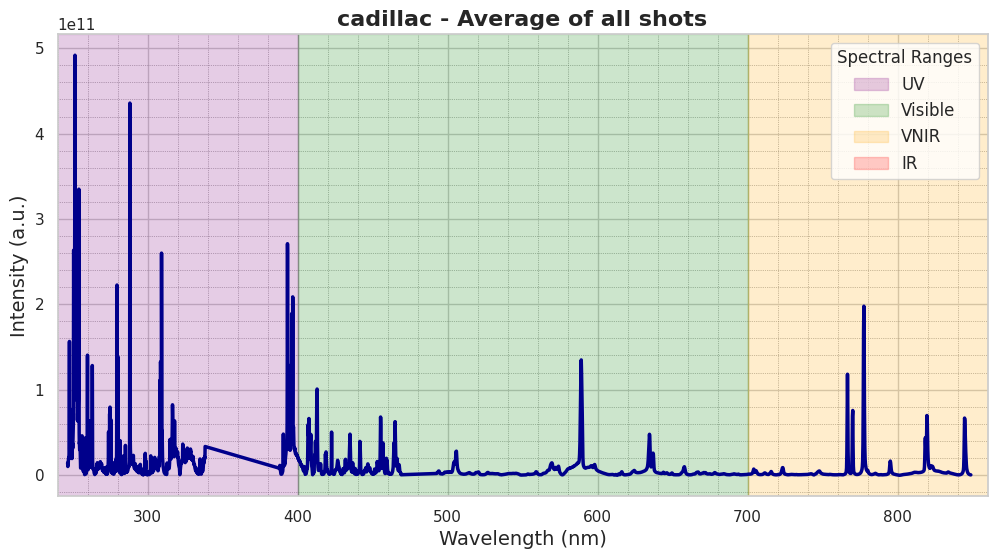

In [262]:
# plot avg. of all shots (y) over wavelength (x)
import matplotlib.pyplot as plt
import seaborn as sns

# drop first row
data = data.iloc[1:]

shots = [col for col in data.columns if "shot" in col]

data["avg"] = data.mean(axis=1)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.plot(data["wave"], data["avg"], linewidth=2.5, linestyle='-', color='darkblue')
# sns.lineplot(x=data["wave"], y=data["avg"], linewidth=2.5, linestyle='-', color='darkblue')

plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

ranges = {
    'UV': (100, 400, 'purple'),
    'Visible': (400, 700, 'green'),
    'VNIR': (700, 1100, 'orange'),
    'IR': (1100, 2500, 'red')
}

for label, (start, end, color) in ranges.items():
    plt.axvspan(start, end, alpha=0.2, label=label, color=color)

plt.title(f"{sample_name} - Average of all shots", fontsize=16, fontweight='bold')
plt.xlabel("Wavelength (nm)", fontsize=14)
plt.ylabel("Intensity (a.u.)", fontsize=14) # a.u. = arbitrary units
plt.legend(title='Spectral Ranges', loc='upper right', fontsize=12)
plt.xlim(240, 860)
plt.show()

In [263]:
labels = pd.read_csv("data/data/calib/ccam_calibration_compositions.csv")

labels.head()

,Target,Spectrum Name,Sample Name,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,MOC total,Used for 2015 calibration,Used for 2021 Mn calibration,Used for 2022 Li calibration
0,AGV2,AGV2,AGV2,59.3,1.05,16.91,6.02,0.099,1.79,5.20,4.19,2.88,97.44,1.0,1.0,1.0
1,BCR-2,BCR2,BCR2,54.1,2.26,13.50,12.42,0.200,3.59,7.12,3.16,1.79,98.14,1.0,1.0,1.0
2,BEN,BEN,BEN,38.2,2.61,10.07,11.61,0.200,13.15,13.87,3.18,1.39,94.28,1.0,1.0,1.0
3,BHVO2,BHVO2,BHVO2,49.9,2.73,13.50,11.07,0.167,7.23,11.40,2.22,0.52,98.74,1.0,1.0,1.0
4,BIR-1a,BIR1,BIR1,47.7,0.97,15.40,10.19,0.176,9.7,13.40,1.81,0.03,99.38,1.0,1.0,1.0


In [264]:
ica = Path("data/data/calib/calib_2015/1600mm/ica/")
pls = Path("data/data/calib/calib_2015/1600mm/pls/")

def get_samples(path):
    return set(map(lambda p: p.name, list(path.glob("*"))))

ica_samples = get_samples(ica)
pls_samples = get_samples(pls)

# samples that are in both pls and ica
print(set(ica_samples) & set(pls_samples))

# samples that are in pls but not in ica
print(set(pls_samples) - set(ica_samples))

# samples that are in ica but not in pls
print(set(ica_samples) - set(pls_samples))

{'jsc1415', 'jsc1387', 'jsc1385', 'gbw07309', 'jsc1438', 'gbw07114', 'umph', 'g22mt', '50tio2', 'jsc1417', 'norite', 'jsc1431', 'granodike', '57a', 'gl7mt', 'jsc1424', 'jsc1378', '54944m', 'hvalfj054', 'jsc1400', 's3a', 'jsc1466', 'ps1', 'dkm1390', 'jdo1', 'cadillac', 'hvalfj017', 'jsc1467', 'swy1', 'jsc1419', 'jsc1404', 'gbw07306', 'jsc1381', 'g28mt', 'g26mt', 'jsc1460', 'jsc1377', 'jsc1445', 'gbw07103', 'r42', 'jsc1374', 'srm98a', 'jsc1447', 'p11mt', 'lp20', 'mix1b', 'jsc1413', 'r45', 'r24', 'ps5', '130', 'g4mt', 'lp11', 'pg1', 'dkm1590', 'pw6', 'pg5', 'sarm17', 'shergottite', '54942m', 'mix2d', 'jsc1459', 'sc7', 'm6mt', 'srm688', '117a', 'p1mt', 'jsc1396', 'lp14', 'r2098m', 'unsak', 'k1919', 'sc3', 'jsc1380', 'jsc1444', 'jsc1428', 'mix3d', 'dkm390', 'srm97a', 'jsc1446', 'gl5mt', 'jsc1418', 'bhvo2', 'mix2b', 's5', 'bk2', 'g14mt', 'dkm3290', 'jsc1420', 'pw3', 'sarm16', 'sc5', 'nat18', 'r11', '3tio2', 'lp4', 'jsc1461', 'mix4d', 'jsc1425', 'sancb', 'mix1o', 'm1mt', 'm5mt', 'jsc1458', 'r

In [265]:
def find_sample_in_labels(sample_name, labels):
    return labels.loc[labels["Sample Name"].str.lower() == sample_name.lower()]

- Train full model to get predictions for all samples for all oxides
- Train 3 sub-models for each oxide

In [266]:
current_sample = find_sample_in_labels(sample_name, labels)
current_sample

,Target,Spectrum Name,Sample Name,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,MOC total,Used for 2015 calibration,Used for 2021 Mn calibration,Used for 2022 Li calibration
225,CADILLAC,CADILLAC,CADILLAC,72.2,0.32,13.07,3.21,0.1,0.21,0.96,4.91,3.95,98.93,1.0,1.0,0.0


In [267]:
from sklearn.cross_decomposition import PLSRegression

full_model = PLSRegression(n_components=2, scale=False)
# full_model.fit()